##Pre-req


Installing JDk

In [35]:
!apt-get update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null   #Install JDk

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Fetched 110 kB in 2s (64.3 kB/s)
^C
^C


Install Spark

In [36]:
pip install pyspark

Traceback (most recent call last):
  File "/usr/local/bin/pip3", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/main.py", line 77, in main
    command = create_command(cmd_name, isolated=("--isolated" in cmd_args))
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/__init__.py", line 114, in create_command
    module = importlib.import_module(module_path)
  File "/usr/lib/python3.10/importlib/__init__.py", line 126, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
  File "<frozen importlib._bootstrap>", line 1050, in _gcd_import
  File "<frozen importlib._bootstrap>", line 1027, in _find_and_load
  File "<frozen importlib._bootstrap>", line 1006, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 688, in _load_unlocked
  File "<frozen importlib._bootstrap_external>", line 883, in exec_module
  File "<frozen importlib._bootstrap>", line 241, in _call_with_

Import Spark libraries

In [3]:
import pyspark
from pyspark.sql import SparkSession as SS

Create Spark Session

In [4]:
Spark= SS.builder.getOrCreate()
Spark

Downloading Dataset from Chicago Data portal

In [60]:
!wget https://data.cityofchicago.org/api/views/ijzp-q8t2/rows.csv?accessType=DOWNLOAD

--2023-09-27 05:18:41--  https://data.cityofchicago.org/api/views/ijzp-q8t2/rows.csv?accessType=DOWNLOAD
Resolving data.cityofchicago.org (data.cityofchicago.org)... 52.206.140.199, 52.206.68.26, 52.206.140.205
Connecting to data.cityofchicago.org (data.cityofchicago.org)|52.206.140.199|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘rows.csv?accessType=DOWNLOAD.1’

rows.csv?accessType     [              <=>   ]   1.74G  2.93MB/s    in 10m 14s 

2023-09-27 05:28:55 (2.90 MB/s) - ‘rows.csv?accessType=DOWNLOAD.1’ saved [1864576035]



In [40]:
!mv rows.csv?accessType=DOWNLOAD crimes.csv

In [58]:
!ls -l

total 17632
-rw-r--r-- 1 root root 15164261 Sep 27 04:39  crimes.csv
-rw-r--r-- 1 root root  2882301 Sep 27 04:39 'rows.csv?accessType=DOWNLOAD'
drwxr-xr-x 1 root root     4096 Sep 25 13:55  sample_data


## **DataFrames**

A DataFrame is similar to an in-memory spreadsheet. Like a spreadsheet:

A DataFrame stores data in cells.
A DataFrame has named columns (usually) and numbered rows.

In [9]:
import numpy as np
import pandas as pd

# Create and populate a 5x2 NumPy array.
my_data = np.array([[0, 3], [10, 7], [20, 9], [30, 14], [40, 15]])

# Create a Python list that holds the names of the two columns.
my_column_names = ['temperature', 'activity']

# Create a DataFrame.
my_dataframe = pd.DataFrame(data=my_data, columns=my_column_names)

# Print the entire DataFrame
print(my_dataframe)

   temperature  activity
0            0         3
1           10         7
2           20         9
3           30        14
4           40        15


Creating a dataframe from CSV

In [11]:
df=pd.read_csv('crimes.csv', header=1)

Creating a Dataframe using Spark

In [5]:
df=Spark.read.csv('crimes.csv', header=True)

In [13]:
df.show(5)

+--------+-----------+--------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|                Date|               Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+--------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
| 5741943|   HN549294|08/25/2007 09:22:...|  074XX N ROGERS AVE|0560|             ASSAULT|              SIMPLE|             

Schema of Dataframe

In [14]:
df.printSchema()

root
 |-- ID: string (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: string (nullable = true)
 |-- Domestic: string (nullable = true)
 |-- Beat: string (nullable = true)
 |-- District: string (nullable = true)
 |-- Ward: string (nullable = true)
 |-- Community Area: string (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: string (nullable = true)
 |-- Y Coordinate: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Updated On: string (nullable = true)
 |-- Latitude: string (nullable = true)
 |-- Longitude: string (nullable = true)
 |-- Location: string (nullable = true)



Change Schema

In [ ]:
from pyspark.sql.types import IntegerType, StringType, BooleanType, StructField, StructType
StructType([
    StructField('ID', StringType, True),
])

Working with Columns in DataFrame

Display first 5 rows of select column

In [18]:
df.select('IUCR').show(5)

+----+
|IUCR|
+----+
|0560|
|0820|
|1320|
|1153|
|0281|
+----+
only showing top 5 rows



Dsiplay multiple columns

In [19]:
df.select('IUCR','Date','Arrest').show(5)

+----+--------------------+------+
|IUCR|                Date|Arrest|
+----+--------------------+------+
|0560|08/25/2007 09:22:...| false|
|0820|01/05/2002 09:24:...|  true|
|1320|09/06/2023 05:00:...| false|
|1153|08/31/2023 12:00:...| false|
|0281|07/24/2023 09:45:...| false|
+----+--------------------+------+
only showing top 5 rows



Drop column

In [20]:
df = df.drop('IUCR')
df.show(5)

+--------+-----------+--------------------+--------------------+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|                Date|               Block|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+--------------------+--------------------+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
| 5741943|   HN549294|08/25/2007 09:22:...|  074XX N ROGERS AVE|             ASSAULT|              SIMPLE|               OTHER| false|   fa

Filtering based on rows

In [21]:
df.groupby('Primary Type').count().show()          #counting based on type of crimes

+--------------------+-------+
|        Primary Type|  count|
+--------------------+-------+
|OFFENSE INVOLVING...|  56574|
|CRIMINAL SEXUAL A...|   7500|
|            STALKING|   5018|
|PUBLIC PEACE VIOL...|  52709|
|           OBSCENITY|    836|
|               ARSON|  13476|
|   DOMESTIC VIOLENCE|      1|
|            GAMBLING|  14624|
|   CRIMINAL TRESPASS| 216195|
|             ASSAULT| 517183|
|LIQUOR LAW VIOLATION|  14980|
| MOTOR VEHICLE THEFT| 387612|
|               THEFT|1666744|
|             BATTERY|1442465|
|             ROBBERY| 296954|
|            HOMICIDE|  12843|
|           RITUALISM|     24|
|    PUBLIC INDECENCY|    196|
| CRIM SEXUAL ASSAULT|  27580|
|   HUMAN TRAFFICKING|    102|
+--------------------+-------+
only showing top 20 rows



In [22]:
df.groupby('Primary Type').count().orderBy('count', ascending=False).show()      #Sorting based on type of crimes

+--------------------+-------+
|        Primary Type|  count|
+--------------------+-------+
|               THEFT|1666744|
|             BATTERY|1442465|
|     CRIMINAL DAMAGE| 900382|
|           NARCOTICS| 749726|
|             ASSAULT| 517183|
|       OTHER OFFENSE| 490131|
|            BURGLARY| 427443|
| MOTOR VEHICLE THEFT| 387612|
|  DECEPTIVE PRACTICE| 352524|
|             ROBBERY| 296954|
|   CRIMINAL TRESPASS| 216195|
|   WEAPONS VIOLATION| 110324|
|        PROSTITUTION|  69927|
|OFFENSE INVOLVING...|  56574|
|PUBLIC PEACE VIOL...|  52709|
|         SEX OFFENSE|  31395|
| CRIM SEXUAL ASSAULT|  27580|
|INTERFERENCE WITH...|  18622|
|LIQUOR LAW VIOLATION|  14980|
|            GAMBLING|  14624|
+--------------------+-------+
only showing top 20 rows



Percentage of Crimes that resulted in arrest

In [23]:
s1=df.count()
s1
df.filter(df.Arrest == 'true').count()/s1

0.2593452805201715

top 3 loc for most crimes

In [24]:
df.groupBy('Location Description').count().orderBy('count',ascending=False).show(3)

+--------------------+-------+
|Location Description|  count|
+--------------------+-------+
|              STREET|2060592|
|           RESIDENCE|1319593|
|           APARTMENT| 899635|
+--------------------+-------+
only showing top 3 rows



#Built in Functions

In [25]:
from pyspark.sql import functions
print(dir(functions))

['Any', 'ArrayType', 'Callable', 'Column', 'DataFrame', 'DataType', 'Dict', 'Iterable', 'JVMView', 'List', 'Optional', 'PandasUDFType', 'PySparkTypeError', 'PySparkValueError', 'SparkContext', 'StringType', 'StructType', 'TYPE_CHECKING', 'Tuple', 'Type', 'Union', 'UserDefinedFunction', 'UserDefinedTableFunction', 'ValuesView', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_create_column_from_literal', '_create_lambda', '_create_py_udf', '_create_py_udtf', '_from_numpy_type', '_get_jvm_function', '_get_lambda_parameters', '_invoke_binary_math_function', '_invoke_function', '_invoke_function_over_columns', '_invoke_function_over_seq_of_columns', '_invoke_higher_order_function', '_options_to_str', '_test', '_to_java_column', '_to_seq', '_unresolved_named_lambda_variable', 'abs', 'acos', 'acosh', 'add_months', 'aes_decrypt', 'aes_encrypt', 'aggregate', 'any_value', 'approxCountDistinct', 'approx_count_distinct', 'approx_percentil

Returning values in upper and lower case for a column

In [27]:
from pyspark.sql.functions import lower,upper
df.select(lower('Primary Type'),upper('Primary Type')).show()

+--------------------+--------------------+
| lower(Primary Type)| upper(Primary Type)|
+--------------------+--------------------+
|             assault|             ASSAULT|
|               theft|               THEFT|
|     criminal damage|     CRIMINAL DAMAGE|
|  deceptive practice|  DECEPTIVE PRACTICE|
|criminal sexual a...|CRIMINAL SEXUAL A...|
|               theft|               THEFT|
|     criminal damage|     CRIMINAL DAMAGE|
|               theft|               THEFT|
|  deceptive practice|  DECEPTIVE PRACTICE|
|               theft|               THEFT|
|               theft|               THEFT|
|  deceptive practice|  DECEPTIVE PRACTICE|
|offense involving...|OFFENSE INVOLVING...|
|             robbery|             ROBBERY|
|criminal sexual a...|CRIMINAL SEXUAL A...|
|             robbery|             ROBBERY|
|offense involving...|OFFENSE INVOLVING...|
|offense involving...|OFFENSE INVOLVING...|
|offense involving...|OFFENSE INVOLVING...|
|offense involving...|OFFENSE IN

Returning substring of a column

In [28]:
from pyspark.sql.functions import substring
df.select(substring('Primary Type',1,4)).show()

+-----------------------------+
|substring(Primary Type, 1, 4)|
+-----------------------------+
|                         ASSA|
|                         THEF|
|                         CRIM|
|                         DECE|
|                         CRIM|
|                         THEF|
|                         CRIM|
|                         THEF|
|                         DECE|
|                         THEF|
|                         THEF|
|                         DECE|
|                         OFFE|
|                         ROBB|
|                         CRIM|
|                         ROBB|
|                         OFFE|
|                         OFFE|
|                         OFFE|
|                         OFFE|
+-----------------------------+
only showing top 20 rows



Return first reported date and latest reported date

In [30]:
from pyspark.sql.functions import min,max
df.select(min('Date'),max('Date')).show(5)

+--------------------+--------------------+
|           min(Date)|           max(Date)|
+--------------------+--------------------+
|01/01/2001 01:00:...|12/31/2022 12:59:...|
+--------------------+--------------------+



Return 3 days after latest date and 3 days before first date

In [ ]:
from pyspark.sql.functions import date_add,date_sub,min,max
df.select(date_add(min(df.Date),3),date_sub(max(df.Date),3)).show(1)

Create a DataFrame

In [52]:
ff=Spark.createDataFrame([('2019-12-25 13:00:05',)],['Christmas'])
ff.show()

+-------------------+
|          Christmas|
+-------------------+
|2019-12-25 13:00:05|
+-------------------+



formatting dates

In [53]:
from pyspark.sql.functions import to_date,to_timestamp,lit
ff.select(to_date(ff.Christmas,'yyyy-MM-dd HH:mm:ss'),to_timestamp(ff.Christmas,'yyyy-MM-dd HH:mm:ss')).show()

+---------------------------------------+--------------------------------------------+
|to_date(Christmas, yyyy-MM-dd HH:mm:ss)|to_timestamp(Christmas, yyyy-MM-dd HH:mm:ss)|
+---------------------------------------+--------------------------------------------+
|                             2019-12-25|                         2019-12-25 13:00:05|
+---------------------------------------+--------------------------------------------+



#Joins

Download police station dataset

In [72]:
!wget -O policestation.csv https://data.cityofchicago.org/api/views/z8bn-74gv/rows.csv?accessType=DOWNLOAD
!ls

--2023-09-27 05:38:15--  https://data.cityofchicago.org/api/views/z8bn-74gv/rows.csv?accessType=DOWNLOAD
Resolving data.cityofchicago.org (data.cityofchicago.org)... 52.206.140.205, 52.206.140.199, 52.206.68.26
Connecting to data.cityofchicago.org (data.cityofchicago.org)|52.206.140.205|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘policestation.csv’

policestation.csv       [ <=>                ]   5.57K  --.-KB/s    in 0s      

2023-09-27 05:38:16 (2.30 GB/s) - ‘policestation.csv’ saved [5699]

 crimes.csv			'rows.csv?accessType=DOWNLOAD.1'
 policestation.csv		'rows.csv?accessType=DOWNLOAD.2'
'rows.csv?accessType=DOWNLOAD'	 sample_data


In [73]:
ps=Spark.read.csv('policestation.csv', header=True)

In [75]:
ps.show(5)
df.show(5)

+------------+-------------+-------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+
|    DISTRICT|DISTRICT NAME|            ADDRESS|   CITY|STATE|  ZIP|             WEBSITE|       PHONE|         FAX|         TTY|X COORDINATE|Y COORDINATE|   LATITUDE|   LONGITUDE|            LOCATION|
+------------+-------------+-------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+
|Headquarters| Headquarters|3510 S Michigan Ave|Chicago|   IL|60653|http://home.chica...|        NULL|        NULL|        NULL| 1177731.401| 1881697.404|41.83070169|-87.62339535|(41.8307016873, -...|
|          18|   Near North| 1160 N Larrabee St|Chicago|   IL|60610|http://home.chica...|312-742-5870|312-742-5771|312-742-5773| 1172080.029| 1908086.527|41.90324165|-87.64335214|(41.9032416531, -

District column in police station dataset doesn't have zeros, so padding

In [79]:
from pyspark.sql.functions import lpad
ps.select(lpad('District',3,'0')).show(5)

+--------------------+
|lpad(District, 3, 0)|
+--------------------+
|                 Hea|
|                 018|
|                 019|
|                 020|
|                 022|
+--------------------+
only showing top 5 rows



In [2]:
!ls

 crimes.csv			'rows.csv?accessType=DOWNLOAD.1'
 policestation.csv		'rows.csv?accessType=DOWNLOAD.2'
'rows.csv?accessType=DOWNLOAD'	 sample_data


creating a new column to hold these values

In [81]:
ps=ps.withColumn('Format_District',lpad('District',3,'0'))

In [82]:
ps.show(5)

+------------+-------------+-------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+---------------+
|    DISTRICT|DISTRICT NAME|            ADDRESS|   CITY|STATE|  ZIP|             WEBSITE|       PHONE|         FAX|         TTY|X COORDINATE|Y COORDINATE|   LATITUDE|   LONGITUDE|            LOCATION|Format_District|
+------------+-------------+-------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+---------------+
|Headquarters| Headquarters|3510 S Michigan Ave|Chicago|   IL|60653|http://home.chica...|        NULL|        NULL|        NULL| 1177731.401| 1881697.404|41.83070169|-87.62339535|(41.8307016873, -...|            Hea|
|          18|   Near North| 1160 N Larrabee St|Chicago|   IL|60610|http://home.chica...|312-742-5870|312-742-5771|312-742-5773| 117

left outer join

All the district entries in Crimes datasheet is returned with "NULL" for missing district details in policestation datasheet



In [83]:
df.join(ps, df.District==ps.Format_District,'left_outer').show()

+--------+-----------+--------------------+--------------------+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+--------+--------------+--------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+---------------+
|      ID|Case Number|                Date|               Block|      Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|DISTRICT| DISTRICT NAME|             ADDRESS|   CITY|STATE|  ZIP|             WEBSITE|       PHONE|         FAX|         TTY|X COORDINATE|Y COORDINATE|   LATITUDE|   LONGITUDE|            LOCATION|Format_District|
+---

##Plotting using matplotlib

Number of Cases in different Locations

In [84]:
import matplotlib as mt
import pandas as pd
l1=[x[0] for x in df.groupBy('Location Description').count().collect()]
l2=[x[1] for x in df.groupBy('Location Description').count().collect()]
ab=pd.DataFrame({'Location':l1,'Count':l2})

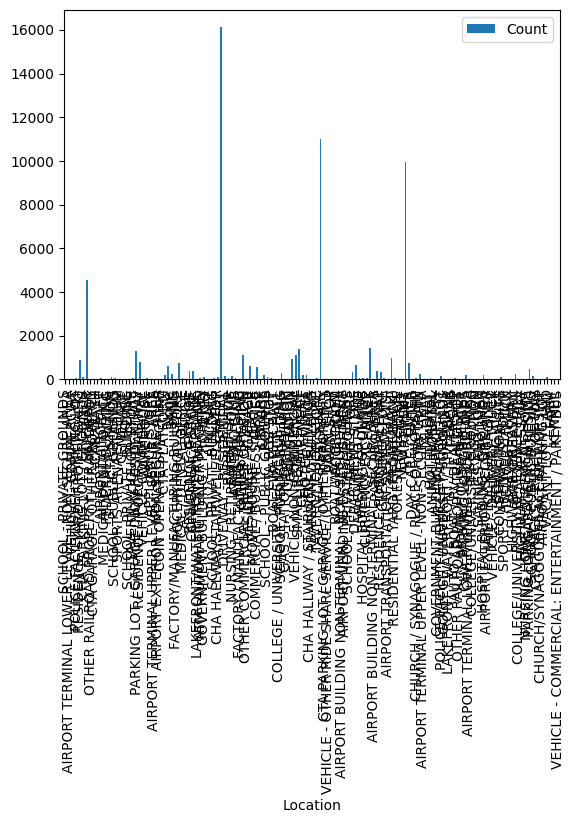

In [92]:
ab.plot(kind='bar',x='Location',y='Count')
mt.xlabel='Location'
mt.ylabel='Count'

##RDDs

In [93]:
from pyspark import SparkContext
SC=SparkContext.getOrCreate()
SC

<SparkContext master=local[*] appName=pyspark-shell>

Reading csv file

In [96]:
PS_Rdd=SC.textFile('policestation.csv')

In [97]:
PS_Rdd.first()

'DISTRICT,DISTRICT NAME,ADDRESS,CITY,STATE,ZIP,WEBSITE,PHONE,FAX,TTY,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION'

In [98]:
Ps_header=PS_Rdd.first()

In [99]:
Ps_rest=PS_Rdd.filter(lambda line : line !=Ps_header)

In [105]:
Ps_rest.filter(lambda line : line.split(',')[1]).collect()

['Headquarters,Headquarters,3510 S Michigan Ave,Chicago,IL,60653,http://home.chicagopolice.org,,,,1177731.401,1881697.404,41.83070169,-87.62339535,"(41.8307016873, -87.6233953459)"',
 '18,Near North,1160 N Larrabee St,Chicago,IL,60610,http://home.chicagopolice.org/community/districts/18th-district-near-north/,312-742-5870,312-742-5771,312-742-5773,1172080.029,1908086.527,41.90324165,-87.64335214,"(41.9032416531, -87.6433521393)"',
 '19,Town Hall,850 W Addison St,Chicago,IL,60613,http://home.chicagopolice.org/community/districts/19th-district-town-hall/,312-744-8320,312-744-4481,312-744-8011,1169730.744,1924160.317,41.94740046,-87.65151202,"(41.9474004564, -87.651512018)"',
 '20,Lincoln,5400 N Lincoln Ave,Chicago,IL,60625,http://home.chicagopolice.org/community/districts/20th-district-lincoln/,312-742-8714,312-742-8803,312-742-8841,1158399.146,1935788.826,41.97954951,-87.69284451,"(41.9795495131, -87.6928445094)"',
 '22,Morgan Park,1900 W Monterey Ave,Chicago,IL,60643,http://home.chicag

In [108]:
Ps_rest.filter(lambda line : line.split(',')[0]=='7').collect()

['7,Englewood,1438 W 63rd St,Chicago,IL,60636,http://home.chicagopolice.org/community/districts/7th-district-englewood/,312-747-8223,312-747-6558,312-747-6652,1167659.235,1863005.522,41.77963154,-87.66088702,"(41.7796315359, -87.6608870173)"']

In [110]:
Ps_rest.filter(lambda line : line.split(',')[0] in ['10','11','12']).collect()

['10,Ogden,3315 W Ogden Ave,Chicago,IL,60623,http://home.chicagopolice.org/community/districts/10th-district-ogden/,312-747-7511,312-747-7429,312-747-7471,1154500.753,1890985.501,41.85668453,-87.70838196,"(41.8566845327, -87.708381958)"',
 '11,Harrison,3151 W Harrison St,Chicago,IL,60612,http://home.chicagopolice.org/community/districts/11th-district-harrison/,312-746-8386,312-746-4281,312-746-5151,1155244.069,1897148.755,41.87358229,-87.70548813,"(41.8735822883, -87.705488126)"',
 '12,Near West,"1412 S Blue Island Ave']